In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("business-licences-1997-to-2012.csv", sep=';')
df2 = pd.read_csv("business-licences-2013-to-2024.csv", sep=';')
df3 = pd.read_csv("business-licences.csv", sep=';')
df = pd.concat([df1, df2, df3], ignore_index=True)

/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_12074/4193657395.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("business-licences-1997-to-2012.csv", sep=';')
/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_12074/4193657395.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("business-licences-2013-to-2024.csv", sep=';')
/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_12074/4193657395.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("business-licences.csv", sep=';')


In [4]:
df.columns

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'geo_point_2d'],
      dtype='object')

In [5]:
import pandas as pd

# Comprehensive business type mapping (including historic types)
business_type_mapping = {
    # Technology & Digital
    'Information Communication Technology': 'Technology & Digital',
    'Digital Entertainment and Interactive Technology': 'Technology & Digital',
    'Computer Services *Historic*': 'Technology & Digital',
    'Telecommunications *Historic*': 'Technology & Digital',
    
    # Construction & Building
    'General Contractor': 'Construction & Building',
    'Trade Contractor': 'Construction & Building',
    'Contractor *Historic*': 'Construction & Building',
    'Contractor - Special Trades *Historic*': 'Construction & Building',
    'Electrical Contractor *Historic*': 'Construction & Building',
    'Gas Contractor *Historic*': 'Construction & Building',
    'Plumber *Historic*': 'Construction & Building',
    'Plumber & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber & Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Roofer *Historic*': 'Construction & Building',
    'Painter *Historic*': 'Construction & Building',
    'Sheet Metal Works *Historic*': 'Construction & Building',
    'Building Repair and Maintenance': 'Construction & Building',
    'General Repair and Maintenance': 'Construction & Building',
    'Repair/ Service/Maintenance *Historic*': 'Construction & Building',
    'Architectural and Engineering Services': 'Construction & Building',
    'Chimney Sweep *Historic*': 'Construction & Building',
    'Locksmith *Historic*': 'Construction & Building',
    
    # Financial Services
    'Financial Services': 'Financial Services',
    'Financial Services *Historic*': 'Financial Services',
    'Money Services': 'Financial Services',
    'Money Services *Historic*': 'Financial Services',
    'Brokerage Services': 'Financial Services',
    'Insurance Services': 'Financial Services',
    'Financial Institution': 'Financial Services',
    'Financial Institution *Historic*': 'Financial Services',
    'Cheque Cashing *Historic*': 'Financial Services',
    'Pawnbroker *Historic*': 'Financial Services',
    
    # Logistics & Transportation
    'Logistics Services': 'Logistics & Transportation',
    'Transportation and Support Services': 'Logistics & Transportation',
    'Moving/Transfer Service *Historic*': 'Logistics & Transportation',
    'Warehouse Operator - Non-Food': 'Logistics & Transportation',
    'Warehouse Operator - Food': 'Logistics & Transportation',
    'Waste Collection and Hauling Services': 'Logistics & Transportation',
    'Recycling and Resource Recovery Services': 'Logistics & Transportation',
    'Recycling Depot *Historic*': 'Logistics & Transportation',
    'Scavenging *Historic*': 'Logistics & Transportation',
    'Dairy Delivery Services *Historic*': 'Logistics & Transportation',
    'Liquor Delivery Services *Historic*': 'Logistics & Transportation',
    
    # Personal & Beauty Services
    'Personal Services': 'Personal & Beauty Services',
    'Personal Services *Historic*': 'Personal & Beauty Services',
    'Beauty Services': 'Personal & Beauty Services',
    'Beauty Services *Historic*': 'Personal & Beauty Services',
    'Health and Beauty *Historic*': 'Personal & Beauty Services',
    'Hairdressing Salon *Historic*': 'Personal & Beauty Services',
    'Hairdresser *Historic*': 'Personal & Beauty Services',
    'Esthetician *Historic*': 'Personal & Beauty Services',
    'Cosmetologist *Historic*': 'Personal & Beauty Services',
    'Electrolysis  *Historic*': 'Personal & Beauty Services',
    'Special Beauty Culturist *Historic*': 'Personal & Beauty Services',
    'Tanning Salon *Historic*': 'Personal & Beauty Services',
    'Nail Technician *Historic*': 'Personal & Beauty Services',
    'Tattoo Parlour *Historic*': 'Personal & Beauty Services',
    'Laundry Services': 'Personal & Beauty Services',
    'Laundry (w/equipment) *Historic*': 'Personal & Beauty Services',
    'Laundry-Coin Operated Services *Historic*': 'Personal & Beauty Services',
    'Laundry Depot *Historic*': 'Personal & Beauty Services',
    'Dry Cleaner *Historic*': 'Personal & Beauty Services',
    'Seamstress/Tailor *Historic*': 'Personal & Beauty Services',
    'Boot & Shoe Repairs *Historic*': 'Personal & Beauty Services',
    
    # Real Estate & Property
    'Long-term Rental': 'Real Estate & Property',
    'Short-term Rental Operator': 'Real Estate & Property',
    'Real Estate Services': 'Real Estate & Property',
    'Real Estate Dealer *Historic*': 'Real Estate & Property',
    'Property Management *Historic*': 'Real Estate & Property',
    'Parking Area / Garage': 'Real Estate & Property',
    'Auto Parking Lot/Parkade *Historic*': 'Real Estate & Property',
    'Backyard Pay Parking *Historic*': 'Real Estate & Property',
    'Duplex *Historic*': 'Real Estate & Property',
    'Multiple Dwelling *Historic*': 'Real Estate & Property',
    'Apartment House *Historic*': 'Real Estate & Property',
    'Apartment House Strata *Historic*': 'Real Estate & Property',
    'Apartment House-99 Year Lease *Historic*': 'Real Estate & Property',
    'Single Detached House *Historic*': 'Real Estate & Property',
    'Secondary Suite - Permanent *Historic*': 'Real Estate & Property',
    'Secondary Suite - Phase Out *Historic*': 'Real Estate & Property',
    'Residential/Commercial *Historic*': 'Real Estate & Property',
    'Pre-1956 Dwelling *Historic*': 'Real Estate & Property',
    'Rooming House *Historic*': 'Real Estate & Property',
    'Non-profit Housing *Historic*': 'Real Estate & Property',
    'Trailer Court *Historic*': 'Real Estate & Property',
    'Personal Care Home *Historic*': 'Real Estate & Property',
    
    # Business & Professional Services
    'Business Support Services': 'Business & Professional Services',
    'Business Services *Historic*': 'Business & Professional Services',
    'Consulting and Management Services': 'Business & Professional Services',
    'Legal Services': 'Business & Professional Services',
    'Design Services': 'Business & Professional Services',
    'Security Services': 'Business & Professional Services',
    'Security Services *Historic*': 'Business & Professional Services',
    'Electrical-Security Alarm Installation *Historic*': 'Business & Professional Services',
    'Rental Services': 'Business & Professional Services',
    'Rentals *Historic*': 'Business & Professional Services',
    'Janitorial Services *Historic*': 'Business & Professional Services',
    'Window Cleaner *Historic*': 'Business & Professional Services',
    'Carpet/Upholstery Cleaner *Historic*': 'Business & Professional Services',
    'Power/ Pressure Washing *Historic*': 'Business & Professional Services',
    'Office *Historic*': 'Business & Professional Services',
    'Employment Agency *Historic*': 'Business & Professional Services',
    'Referral Services *Historic*': 'Business & Professional Services',
    'Travel Agent *Historic*': 'Business & Professional Services',
    'Dating Services *Historic*': 'Business & Professional Services',
    'Postal Rental Agency *Historic*': 'Business & Professional Services',
    'Equipment Operator *Historic*': 'Business & Professional Services',
    'Specialized Services *Historic*': 'Business & Professional Services',
    
    # Education & Training
    'Arts and Creative Instruction': 'Education & Training',
    'Business - Vocational Instruction': 'Education & Training',
    'Sport and Fitness Instruction': 'Education & Training',
    'Private School or College': 'Education & Training',
    'Instruction *Historic*': 'Education & Training',
    'School (Business & Trade) *Historic*': 'Education & Training',
    'ESL Instruction *Historic*': 'Education & Training',
    'Educational *Historic*': 'Education & Training',
    
    # Arts, Media & Entertainment
    'Artist': 'Arts, Media & Entertainment',
    'Artist *Historic*': 'Arts, Media & Entertainment',
    'Artist Studio': 'Arts, Media & Entertainment',
    'Artist Live/Work Studio *Historic*': 'Arts, Media & Entertainment',
    'Artist Agency': 'Arts, Media & Entertainment',
    'Photography Production and Rehearsal Studio': 'Arts, Media & Entertainment',
    'Publishing and Journalism Services': 'Arts, Media & Entertainment',
    'Entertainment Facility': 'Arts, Media & Entertainment',
    'Entertainment Services *Historic*': 'Arts, Media & Entertainment',
    'Entertainment Centre *Historic*': 'Arts, Media & Entertainment',
    'Theatre': 'Arts, Media & Entertainment',
    'Theatre *Historic*': 'Arts, Media & Entertainment',
    'Venue': 'Arts, Media & Entertainment',
    'Venue *Historic*': 'Arts, Media & Entertainment',
    'Creative Products Manufacturer': 'Arts, Media & Entertainment',
    'Studio *Historic*': 'Arts, Media & Entertainment',
    'Production Company *Historic*': 'Arts, Media & Entertainment',
    'Temporary Filming Company': 'Arts, Media & Entertainment',
    'Photographer *Historic*': 'Arts, Media & Entertainment',
    'Photo Services *Historic*': 'Arts, Media & Entertainment',
    'Talent Agency *Historic*': 'Arts, Media & Entertainment',
    'Model Agency *Historic*': 'Arts, Media & Entertainment',
    'Booking Agency *Historic*': 'Arts, Media & Entertainment',
    
    # Marketing & Events
    'Marketing Public Relations Advertising and Event Promotion Services': 'Marketing & Events',
    'Special Events': 'Marketing & Events',
    'Printing Imaging and Photo Services': 'Marketing & Events',
    'Printing Services *Historic*': 'Marketing & Events',
    'Blueprint Printing *Historic*': 'Marketing & Events',
    'Sign Permit *Historic*': 'Marketing & Events',
    'Exhibitions/Shows/Concerts *Historic*': 'Marketing & Events',
    'Late Night Dance Event *Historic*': 'Marketing & Events',
    
    # Events & Entertainment Venues
    'Exhibition Centre': 'Events & Entertainment Venues',
    'Hall / Spectator Sports Venue': 'Events & Entertainment Venues',
    'Assembly Hall *Historic*': 'Events & Entertainment Venues',
    'Stadium/Concert Hall  *Historic*': 'Events & Entertainment Venues',
    'Amusement Park': 'Events & Entertainment Venues',
    'Bingo Hall / Casino / Horse Racing': 'Events & Entertainment Venues',
    'Bingo Hall *Historic*': 'Events & Entertainment Venues',
    'Casino *Historic*': 'Events & Entertainment Venues',
    'Horse Racing *Historic*': 'Events & Entertainment Venues',
    'Dance Hall *Historic*': 'Events & Entertainment Venues',
    'Arcade *Historic*': 'Events & Entertainment Venues',
    'Bowling Alley *Historic*': 'Events & Entertainment Venues',
    'Family Sports & Entertain Ctr *Historic*': 'Events & Entertainment Venues',
    'Billiard Room Keeper *Historic*': 'Events & Entertainment Venues',
    
    # Healthcare
    'Health Care Professionals and Services': 'Healthcare',
    'Health Services *Historic*': 'Healthcare',
    'Health Care Facility': 'Healthcare',
    'Health Enhancement Services': 'Healthcare',
    'Pharmacy': 'Healthcare',
    'Laboratory Services': 'Healthcare',
    'Acupuncturist *Historic*': 'Healthcare',
    'Massage Therapist *Historic*': 'Healthcare',
    'Physical Therapist *Historic*': 'Healthcare',
    'Therapeutic Touch Technique *Historic*': 'Healthcare',
    'Private Hospital *Historic*': 'Healthcare',
    'Herbalist *Historic*': 'Healthcare',
    'Psychic/Fortune Teller *Historic*': 'Healthcare',
    'Veterinarian *Historic*': 'Healthcare',
    'Animal Clinic/Hospital *Historic*': 'Healthcare',
    
    # Fitness & Wellness
    'Fitness Centre': 'Fitness & Wellness',
    'Steam Bath *Historic*': 'Fitness & Wellness',
    
    # Retail - General
    'Retail Dealer': 'Retail - General',
    'Retail Dealer *Historic*': 'Retail - General',
    'Retail Dealer - Used Goods': 'Retail - General',
    'Retail with Anc. Secondhand *Historic*': 'Retail - General',
    'Secondhand Dealer *Historic*': 'Retail - General',
    'Junk Dealer *Historic*': 'Retail - General',
    'Street Vendor': 'Retail - General',
    'Peddler *Historic*': 'Retail - General',
    'Peddler - Food *Historic*': 'Retail - General',
    'Transient Trader/Peddler-A *Historic*': 'Retail - General',
    'Transient Trader/Peddler-W *Historic*': 'Retail - General',
    'Vending Machines *Historic*': 'Retail - General',
    'Pet Store *Historic*': 'Retail - General',
    'Jeweller *Historic*': 'Retail - General',
    'Machinery Dealer *Historic*': 'Retail - General',
    
    # Retail - Specialized
    'Retail Dealer - Cannabis': 'Retail - Specialized',
    'Cannabis Licence Application': 'Retail - Specialized',
    'Adult Retail Store': 'Retail - Specialized',
    'Adult Retail Store *Historic*': 'Retail - Specialized',
    'Adult Entertainment Store *Historic*': 'Retail - Specialized',
    
    # Food Retail
    'Retail Dealer - Food': 'Food Retail',
    'Retail Dealer - Food *Historic*': 'Food Retail',
    'Grocery Store': 'Food Retail',
    'Retail Dealer - Grocery *Historic*': 'Food Retail',
    'Food Market': 'Food Retail',
    'Retail Dealer - Market Outlet *Historic*': 'Food Retail',
    'Public Market Operator-Annual *Historic*': 'Food Retail',
    'Public Market - Daily *Historic*': 'Food Retail',
    'Liquor Retail Store': 'Food Retail',
    'Liquor Retail Store *Historic*': 'Food Retail',
    'Specialty Wine Store *Historic*': 'Food Retail',
    'U-Brew/U-Vin *Historic*': 'Food Retail',
    'Christmas Tree Lot *Historic*': 'Food Retail',
    
    # Food Service & Hospitality
    'Restaurant': 'Food Service',
    'Restaurant Class 1 *Historic*': 'Food Service',
    'Restaurant Class 2 *Historic*': 'Food Service',
    'Restaurant Class 1 & Karaoke *Historic*': 'Food Service',
    'Limited Service Food Establishment': 'Food Service',
    'Ltd Service Food Establishment *Historic*': 'Food Service',
    'Caterer': 'Food Service',
    'CNIB Concession - Food *Historic*': 'Food Service',
    'Liquor Establishment': 'Food Service',
    'Liquor Establishment Standard *Historic*': 'Food Service',
    'Liquor Establishment Extended  *Historic*': 'Food Service',
    'Liquor License Application': 'Food Service',
    'Temp Liquor Licence Amendment': 'Food Service',
    'Provincial Liquor Review *Historic*': 'Food Service',
    'Dining Lounge *Historic*': 'Food Service',
    'Dining Lounge/Room *Historic*': 'Food Service',
    "Lounge 'A' *Historic*": 'Food Service',
    'Club Lounge *Historic*': 'Food Service',
    'Hotel Lounge *Historic*': 'Food Service',
    'Neighbourhood Pub *Historic*': 'Food Service',
    'Public House *Historic*': 'Food Service',
    'Marine Pub *Historic*': 'Food Service',
    'Cabaret *Historic*': 'Food Service',
    'Club *Historic*': 'Food Service',
    'Club Manager *Historic*': 'Food Service',
    
    # Accommodation
    'Hotel or Motel': 'Accommodation',
    'Motel *Historic*': 'Accommodation',
    'Bed and Breakfast': 'Accommodation',
    'Live-aboards *Historic*': 'Accommodation',
    
    # Manufacturing & Processing
    'Non-Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Manufacturer *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food *Historic*': 'Manufacturing & Processing',
    'Manufacturer with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Food Processing *Historic*': 'Manufacturing & Processing',
    'Product Assembly *Historic*': 'Manufacturing & Processing',
    'Homecraft *Historic*': 'Manufacturing & Processing',
    
    # Wholesale
    'Wholesale Dealer - Non-Food': 'Wholesale',
    'Wholesale Dealer - Food': 'Wholesale',
    'Wholesale  Dealer *Historic*': 'Wholesale',
    'Wholesale Dealer - Food *Historic*': 'Wholesale',
    'Wholesale Dealer w/ Anc. Retail *Historic*': 'Wholesale',
    'Wholesale Dealer - Food with Anc. Retail *Historic*': 'Wholesale',
    'Auto Wholesaler *Historic*': 'Wholesale',
    'Lumber Yard *Historic*': 'Wholesale',
    
    # Automotive & Fuel
    'Gas Station': 'Automotive & Fuel',
    'Gasoline Station *Historic*': 'Automotive & Fuel',
    'Self-serve Station *Historic*': 'Automotive & Fuel',
    'Conventional Gas Station *Historic*': 'Automotive & Fuel',
    'Split-island Station *Historic*': 'Automotive & Fuel',
    'Gas Station - Marine *Historic*': 'Automotive & Fuel',
    'Gas Station - Propane *Historic*': 'Automotive & Fuel',
    'Card Lock Station *Historic*': 'Automotive & Fuel',
    'Marine Service Station': 'Automotive & Fuel',
    'Oil Gas and Other Fuels': 'Automotive & Fuel',
    'Vehicle Repair Detailing and Washing Services': 'Automotive & Fuel',
    'Auto Repairs *Historic*': 'Automotive & Fuel',
    'Auto Detailing *Historic*': 'Automotive & Fuel',
    'Auto Washer *Historic*': 'Automotive & Fuel',
    'Auto Painter & Body Shop *Historic*': 'Automotive & Fuel',
    'Auto Dealer *Historic*': 'Automotive & Fuel',
    'Auto Wrecker *Historic*': 'Automotive & Fuel',
    
    # Mining & Natural Resources
    'Mining Services': 'Mining & Natural Resources',
    'Forestry Services': 'Mining & Natural Resources',
    
    # Tourism & Recreation
    'Tourism Services': 'Tourism & Recreation',
    'Marina Operator': 'Tourism & Recreation',
    'Marina Operator *Historic*': 'Tourism & Recreation',
    'Marine Services *Historic*': 'Tourism & Recreation',
    'Boat Charter Services *Historic*': 'Tourism & Recreation',
    'Livery & Feed Stables *Historic*': 'Tourism & Recreation',
    
    # Community & Non-Profit
    'Association or Society': 'Community & Non-Profit',
    'Community Association *Historic*': 'Community & Non-Profit',
    'Community Association Manager *Historic*': 'Community & Non-Profit',
    'Soliciting For Charity': 'Community & Non-Profit',
    
    # Animal Services
    'Animal Services': 'Animal Services',
    'Animal Services *Historic*': 'Animal Services',
    
    # Agriculture & Urban Farming
    'Urban Farm Class A': 'Agriculture & Urban Farming',
    'Urban Farm Class B': 'Agriculture & Urban Farming',
    'Agriculture *Historic*': 'Agriculture & Urban Farming',
    
    # Adult Entertainment
    'Adult Services': 'Adult Entertainment',
    'Body Rub Parlour *Historic*': 'Adult Entertainment',
    'Exotic Dancers *Historic*': 'Adult Entertainment',
    'Social Escort Services *Historic*': 'Adult Entertainment',
    
    # Special/Other
    '2010 Winter Games *Historic*': 'Special Events & Games',
    'Auctioneer *Historic*': 'Auction & Estate Services',
    'Bottle Depot *Historic*': 'Recycling & Bottle Depots',
    'Funeral Services *Historic*': 'Funeral & Memorial Services',
    'Landscape Gardener *Historic*': 'Landscaping Services',
    'Pest Control/Exterminator *Historic*': 'Pest Control Services',
    'Piano Tuner *Historic*': 'Specialty Services',
}

# Map BusinessType to 10 top-level categories
top_level_mapping = {
    # 1. Technology & Digital
    'Technology & Digital': 'Technology & Digital',
    
    # 2. Construction & Building
    'Construction & Building': 'Construction & Building',
    
    # 3. Financial Services
    'Financial Services': 'Financial Services',
    
    # 4. Logistics & Transportation
    'Logistics & Transportation': 'Logistics & Transportation',
    
    # 5. Personal & Beauty Services
    'Personal & Beauty Services': 'Personal & Beauty Services',
    
    # 6. Real Estate & Property
    'Real Estate & Property': 'Real Estate & Property',
    
    # 7. Business & Professional Services
    'Business & Professional Services': 'Business & Professional Services',
    
    # 8. Education, Arts & Entertainment
    'Education & Training': 'Education, Arts & Entertainment',
    'Arts, Media & Entertainment': 'Education, Arts & Entertainment',
    'Marketing & Events': 'Education, Arts & Entertainment',
    'Events & Entertainment Venues': 'Education, Arts & Entertainment',
    
    # 9. Healthcare & Wellness
    'Healthcare': 'Healthcare & Wellness',
    'Fitness & Wellness': 'Healthcare & Wellness',
    
    # 10. Food, Retail & Accommodation
    'Food Retail': 'Food, Retail & Accommodation',
    'Food Service': 'Food, Retail & Accommodation',
    'Accommodation': 'Food, Retail & Accommodation',
    'Retail - General': 'Food, Retail & Accommodation',
    'Retail - Specialized': 'Food, Retail & Accommodation',
    
    # 11. Manufacturing & Industrial (optional if needed)
    'Manufacturing & Processing': 'Manufacturing & Industrial',
    'Wholesale': 'Manufacturing & Industrial',
    'Automotive & Fuel': 'Manufacturing & Industrial',
    'Mining & Natural Resources': 'Manufacturing & Industrial',
    
    # 12. Other / Misc
    'Tourism & Recreation': 'Other / Misc',
    'Community & Non-Profit': 'Other / Misc',
    'Animal Services': 'Other / Misc',
    'Agriculture & Urban Farming': 'Other / Misc',
    'Adult Entertainment': 'Other / Misc',
    'Special Events & Games': 'Other / Misc',
    'Auction & Estate Services': 'Other / Misc',
    'Recycling & Bottle Depots': 'Other / Misc',
    'Funeral & Memorial Services': 'Other / Misc',
    'Landscaping Services': 'Other / Misc',
    'Pest Control Services': 'Other / Misc',
    'Specialty Services': 'Other / Misc',
}

# First map the detailed BusinessType to its intermediate category
df['BusinessCategory'] = df['BusinessType'].map(business_type_mapping)

# Then map intermediate category to top-level category
df['TopLevelCategory'] = df['BusinessCategory'].map(top_level_mapping)

# Fill any missing categories
df['TopLevelCategory'].fillna('Other / Misc', inplace=True)

df['TopLevelCategory'].value_counts()

/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_12074/1830315250.py:435: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TopLevelCategory'].fillna('Other / Misc', inplace=True)


TopLevelCategory
Real Estate & Property              470333
Business & Professional Services    341232
Food, Retail & Accommodation        321290
Construction & Building             237467
Healthcare & Wellness               116193
Manufacturing & Industrial          104010
Education, Arts & Entertainment      78426
Personal & Beauty Services           68047
Financial Services                   49073
Other / Misc                         42122
Technology & Digital                 32205
Logistics & Transportation           12903
Name: count, dtype: int64

In [6]:
df.columns

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'geo_point_2d', 'BusinessCategory', 'TopLevelCategory'],
      dtype='object')

In [7]:
import pandas as pd
import numpy as np

# Convert 2-digit years to 4-digit years
def convert_to_full_year(year):
    if year >= 97:  # 97-99 are 1997-1999
        return 1900 + year
    else:  # 0-25 are 2000-2025
        return 2000 + year

# Apply the conversion
df = df[df['FOLDERYEAR'] != 96]
df['FOLDERYEAR'] = df['FOLDERYEAR'].apply(convert_to_full_year)

def load_and_clean(df):

    # --- Standardize column names (lowercase, no spaces) ---
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # assign year
    df['year'] = df['folderyear']

    # --- Fix BusinessTradeName NaN ---
    df['businesstradename'] = df['businesstradename'].fillna('')

    # --- Create unique business ID ---
    # Rule:
    # If BusinessTradeName != '', treat BusinessName + BusinessTradeName as unique
    # If BusinessTradeName == '', then BusinessName is the unique identifier
    df['business_id'] = (
        df['businessname'].str.strip().str.lower() +
        "_" +
        df['businesstradename'].str.strip().str.lower()
    ).str.replace(' ', '_')

    # If trade name is empty, remove trailing "_"
    df['business_id'] = df['business_id'].str.replace('_$', '', regex=True)

    # Fallback protection: if still blank, use BusinessName itself
    empty_mask = df['business_id'].str.len() == 0
    df.loc[empty_mask, 'business_id'] = df.loc[empty_mask, 'businessname'].str.strip().str.lower()

    # Rename TopLevelCategory to BusinessType
    df['businesstype'] = df['toplevelcategory']
    
    # Return clean subset
    keep_cols = [
        'business_id', 'businessname', 'businesstradename',
        'businesstype', 'localarea', 'year', 'status'
    ]
    return df[keep_cols]

load_and_clean(df)
print(df.head)

<bound method NDFrame.head of          folderyear  licencersn licencenumber  licencerevisionnumber  \
0              1998      173103     98-212536                    0.0   
1              1998      173119     98-212552                    0.0   
2              1998      173217     98-212650                    0.0   
3              1998      173496     98-212929                    0.0   
4              1998      173617     98-213050                    0.0   
...             ...         ...           ...                    ...   
1873296        2025     4676153     25-157756                    0.0   
1873297        2025     4676163     25-157766                    0.0   
1873298        2025     4676167     25-157770                    0.0   
1873299        2025     4676172     25-157775                    0.0   
1873300        2025     4676173     25-157776                    0.0   

                             businessname businesstradename  \
0                 Rubien Tang Benjamin Ng 

In [8]:
df['folderyear'].value_counts()

folderyear
2024    128581
2019     70773
2023     69793
2020     69300
2025     69081
2022     68423
2021     68389
2018     66177
1997     65264
1998     63571
2016     61394
2015     60937
2013     60914
2014     60580
2011     60509
2001     60324
2012     60320
2010     60198
2017     60060
2005     59707
1999     59662
2003     59480
2004     59467
2009     59111
2002     58684
2006     58483
2000     58358
2008     58155
2007     57595
Name: count, dtype: int64

In [9]:
life = (
    df.groupby("business_id")
    .agg(
        start_year = ('year', 'min'),
        end_year   = ('year', 'max'),
        sector     = ('businesstype', lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0]),
        local_area = ('localarea', lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0]),
        n_years    = ('year', 'nunique'),
        last_status=('status', 'last')
    )
    .reset_index()
)


In [10]:
CENSOR_YEAR = 2024

life['event'] = (life['end_year'] < CENSOR_YEAR).astype(int)   # 1 = died, 0 = censored
life.loc[life['end_year'] > CENSOR_YEAR, 'end_year'] = CENSOR_YEAR

life['duration'] = life['end_year'] - life['start_year'] + 1


In [11]:
life['cohort'] = np.where(life['start_year'] < 2020, 'pre_covid', 'post_covid')

In [12]:
!pip install lifelines

In [13]:
df['businesstype'].value_counts()

businesstype
Real Estate & Property              470332
Business & Professional Services    341227
Food, Retail & Accommodation        321288
Construction & Building             237466
Healthcare & Wellness               116193
Manufacturing & Industrial          104009
Education, Arts & Entertainment      78425
Personal & Beauty Services           68047
Financial Services                   49073
Other / Misc                         42122
Technology & Digital                 32205
Logistics & Transportation           12903
Name: count, dtype: int64

In [14]:
def map_sector(x):
    """
    Map raw BusinessType text into the 12 final consolidated sector groups.
    This uses keyword matching so even messy historical labels will be assigned correctly.
    """
    x = str(x).lower()

    if any(k in x for k in [
        'real estate', 'property', 'strata', 'realtor', 'realty'
    ]):
        return 'Real Estate & Property'

    if any(k in x for k in [
        'professional', 'consult', 'legal', 'account', 
        'business service', 'marketing', 'architecture', 'engineering'
    ]):
        return 'Business & Professional Services'

    if any(k in x for k in [
        'restaurant', 'food', 'retail', 'cafe', 'bar', 'store',
        'accommodation', 'hotel', 'motel', 'lodging'
    ]):
        return 'Food, Retail & Accommodation'

    if any(k in x for k in [
        'construction', 'contractor', 'builder', 'electrical',
        'plumbing', 'hvac', 'renovation', 'building'
    ]):
        return 'Construction & Building'

    if any(k in x for k in [
        'clinic', 'health', 'wellness', 'therapy', 'massage', 'chiro',
        'dental', 'medical', 'physio'
    ]):
        return 'Healthcare & Wellness'

    if any(k in x for k in [
        'manufactur', 'industrial', 'machine', 'factory',
        'production', 'fabrication'
    ]):
        return 'Manufacturing & Industrial'

    if any(k in x for k in [
        'education', 'school', 'training', 'tutor', 'academy',
        'art', 'music', 'dance', 'entertainment'
    ]):
        return 'Education, Arts & Entertainment'

    if any(k in x for k in [
        'beauty', 'salon', 'spa', 'barber', 'esthetic',
        'personal service', 'nail', 'hair'
    ]):
        return 'Personal & Beauty Services'

    if any(k in x for k in [
        'finance', 'financial', 'insurance', 'investment', 'bank'
    ]):
        return 'Financial Services'

    if any(k in x for k in [
        'tech', 'software', 'digital', 'it services', 'computer',
        'web', 'ai', 'cloud'
    ]):
        return 'Technology & Digital'

    if any(k in x for k in [
        'logistic', 'transport', 'delivery', 'courier',
        'freight', 'shipping'
    ]):
        return 'Logistics & Transportation'

    return 'Other / Misc'

In [15]:
life['sector_group'] = life['sector'].apply(map_sector)

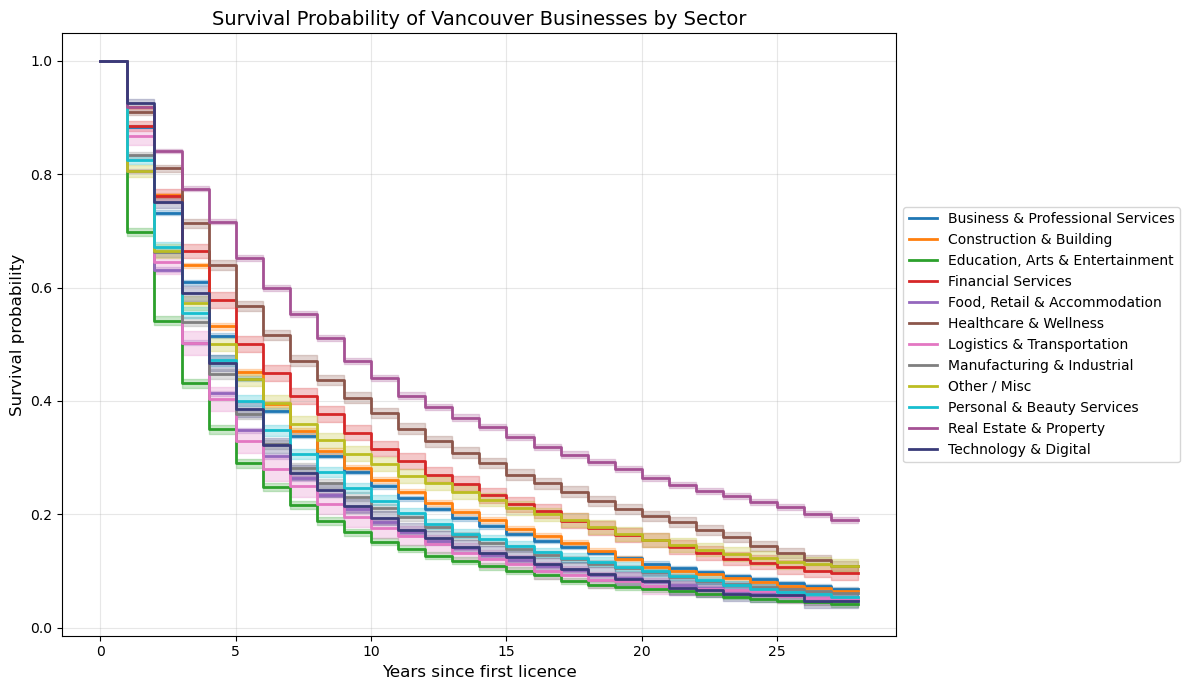

In [17]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import itertools

kmf = KaplanMeierFitter()
plt.figure(figsize=(12,7))

# Define a long color palette (12 distinct colors)
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#a55194", "#393b79"
]

# Cycle through colors manually
color_cycle = itertools.cycle(colors)

for sector, g in life.groupby("sector_group"):
    c = next(color_cycle)
    kmf.fit(g['duration'], g['event'], label=sector)
    kmf.plot_survival_function(color=c, linewidth=2)

plt.title("Survival Probability of Vancouver Businesses by Sector", fontsize=14)
plt.xlabel("Years since first licence", fontsize=12)
plt.ylabel("Survival probability", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


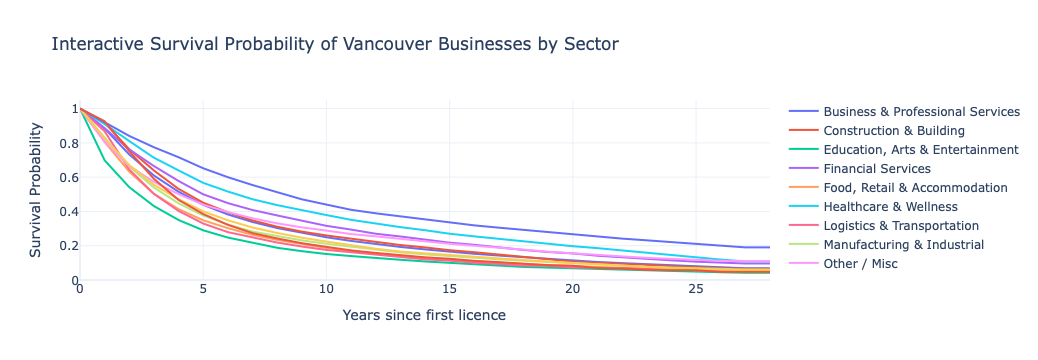

In [18]:
cox_df = life[['duration','event','sector_group','local_area','cohort']].copy()

# Convert categoricals to dummies
cox_df = pd.get_dummies(
    cox_df,
    columns=['sector_group','local_area','cohort'],
    drop_first=True
)

cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='event')
cph.print_summary()

/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['local_area_UBC'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column local_area_Arbutus-Ridge have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'local_area_Arbutus-Ridge'].var())
>>> print(df.loc[~events, 'local_area_Arbutus-Ridge'].var())

A very low variance means that the column local_area_Arbutus-Ridge completely determines whether a subject dies or

<lifelines.CoxPHFitter: fitted with 248225 total observations, 64788 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 248225
number of events observed = 183437
   partial log-likelihood = -2050325.82
         time fit was run = 2025-11-25 03:39:52 UTC

---
                                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                      
sector_group_Construction & Building          -0.15      0.86      0.01           -0.17           -0.14                0.84                0.87
sector_group_Education, Arts & Entertainment   0.41      1.51      0.01            0.39            0.43                1.48                1.54
sector_group_Financial Services               -0.08      0.93      0.02           -0.11           -0.04                0.90                0.96
sector_group_Food, Retail & Accommodation      0.23      1.26      0.01            0.22            0.25                1.24                1.28
sector_group_Healthcare & Wellness            -0.17      0.84      0.01           -0.19           -0.15                0.83                0.86
sector_group_Logistics & Transportation        0.16      1.18      0.02            0.12            0.21                1.12                1.24
sector_group_Manufacturing & Industrial        0.11      1.11      0.01            0.09            0.13                1.09                1.14
sector_group_Other / Misc                      0.06      1.06      0.02            0.03            0.09                1.03                1.10
sector_group_Personal & Beauty Services        0.14      1.16      0.01            0.12            0.17                1.13                1.18
sector_group_Real Estate & Property           -0.29      0.75      0.01           -0.31           -0.28                0.73                0.76
sector_group_Technology & Digital              0.17      1.18      0.02            0.13            0.20                1.14                1.22
local_area_Arbutus-Ridge                     -18.65      0.00    298.10         -602.91          565.62                0.00           4.40e+245
local_area_Downtown                          -18.67      0.00     74.98         -165.63          128.30                0.00            5.23e+55
local_area_Dunbar-Southlands                 -18.62      0.00    263.91         -535.87          498.63                0.00           3.55e+216
local_area_Fairview                          -18.68      0.00    119.39         -252.69          215.33                0.00            3.29e+93
local_area_Grandview-Woodland                -18.69      0.00    164.84         -341.76          304.39                0.00           1.56e+132
local_area_Hastings-Sunrise                  -18.63      0.00    186.78         -384.72          347.45                0.00           7.86e+150
local_area_Kensington-Cedar Cottage          -18.61      0.00    146.44         -305.63          268.41                0.00           3.70e+116
local_area_Kerrisdale                        -18.67      0.00    308.40         -623.11          585.78                0.00           2.52e+254
local_area_Killarney                         -18.59      0.00    266.93         -541.76          504.58                0.00           1.37e+219
local_area_Kitsilano                         -18.65      0.00    133.27         -279.86          242.56                0.00           2.21e+105
local_area_Marpole                           -18.63      0.00    190.19         -391.41          354.14                0.00           6.33e+153
local_area_Mount Pleasant                    -18.66      0.00    142.93         -298.80          261.48                0.00           3.61e+113
local_area_Oakridge     

In [19]:
median_life = (
    life.groupby('sector_group')['duration']
    .median()
    .sort_values()
)

print(median_life)


sector_group
Education, Arts & Entertainment     2.0
Food, Retail & Accommodation        3.0
Logistics & Transportation          3.0
Manufacturing & Industrial          3.0
Personal & Beauty Services          3.0
Technology & Digital                3.0
Business & Professional Services    4.0
Construction & Building             4.0
Financial Services                  4.0
Healthcare & Wellness               4.0
Other / Misc                        4.0
Real Estate & Property              6.0
Name: duration, dtype: float64


GOB Business Counts:
FOLDERYEAR
1996       1
1997    8671
1998    9621
1999    7084
2000    4568
2001    7721
2002    5965
2003    7306
2004    6764
2005    6563
2006    5756
2007    5361
2008    5171
2009    5011
2010    4884
2011    6160
2012    5177
2013    5329
2014    4751
2015    5481
2016    6936
2017    3669
2018    3809
2019    5481
2020    5005
2021    4413
2022    4869
2023    6297
2024    8333
2025    2782
dtype: int64

Total Business Counts:
FOLDERYEAR
1996        11
1997     65264
1998     63571
1999     59662
2000     58358
2001     60324
2002     58684
2003     59480
2004     59467
2005     59707
2006     58483
2007     57595
2008     58155
2009     59111
2010     60198
2011     60509
2012     60320
2013     60914
2014     60580
2015     60937
2016     61394
2017     60060
2018     66177
2019     70773
2020     69300
2021     68389
2022     68423
2023     69793
2024    128581
2025     69081
dtype: int64

GOB Proportion (%):
FOLDERYEAR
1996     9.090909
1997    13.286038

<Figure size 1200x600 with 0 Axes>

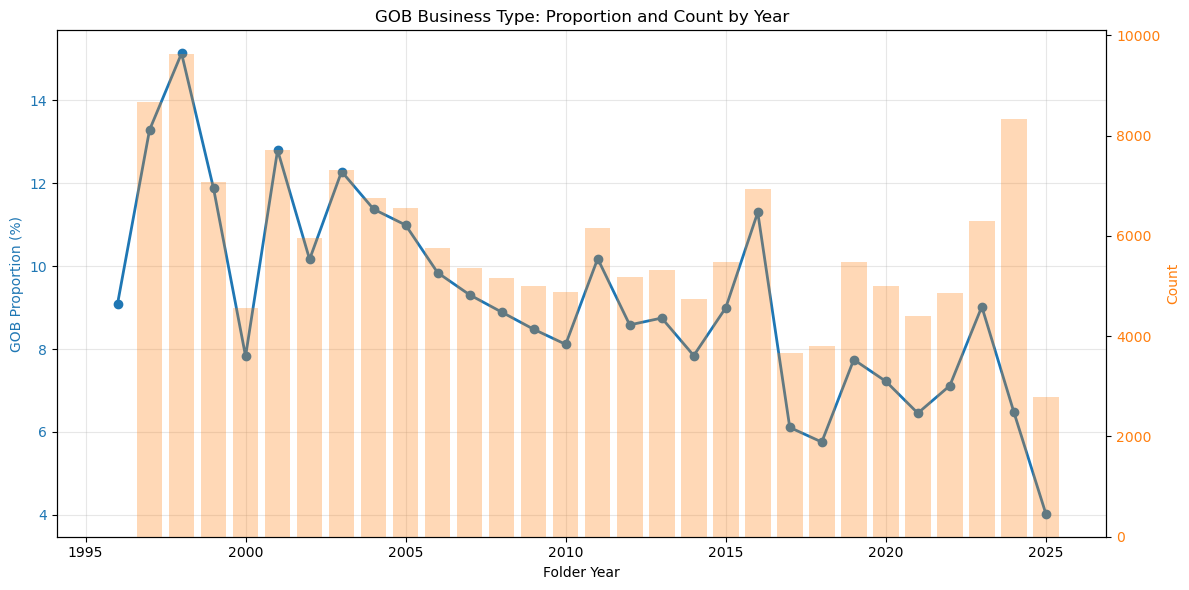

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for GOB business type
gob_df = df_combined[df_combined['Status'] == 'Gone Out of Business']

# Count total businesses per year
total_by_year = df_combined.groupby('FOLDERYEAR').size()

# Count GOB businesses per year
gob_by_year = gob_df.groupby('FOLDERYEAR').size()

# Calculate proportion
gob_proportion = (gob_by_year / total_by_year * 100).fillna(0)

# Display results
print("GOB Business Counts:")
print(gob_by_year)
print("\nTotal Business Counts:")
print(total_by_year)
print("\nGOB Proportion (%):")
print(gob_proportion)

# Plot the proportion
plt.figure(figsize=(12, 6))

# Create subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot proportion on left axis
color = 'tab:blue'
ax1.set_xlabel('Folder Year')
ax1.set_ylabel('GOB Proportion (%)', color=color)
ax1.plot(gob_proportion.index, gob_proportion.values, marker='o', linewidth=2, color=color, label='GOB Proportion')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Plot counts on right axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Count', color=color)
ax2.bar(gob_by_year.index, gob_by_year.values, alpha=0.3, color=color, label='GOB Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GOB Business Type: Proportion and Count by Year')
fig.tight_layout()
plt.show()

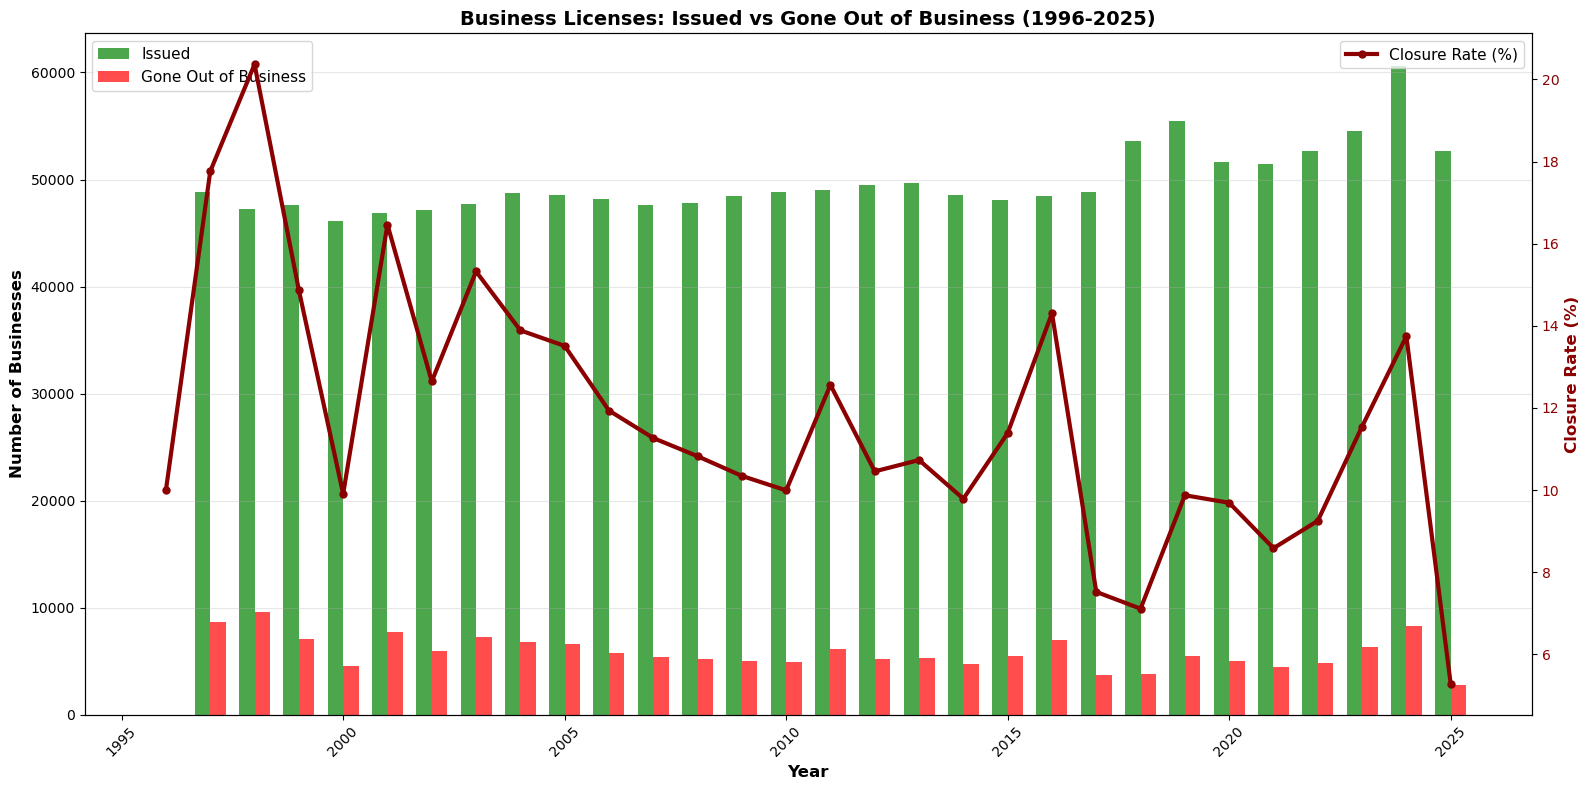

In [87]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot issued and gone out of business
x = status_comparison.index
width = 0.35

bars1 = ax1.bar(x - width/2, status_comparison['Issued'], width, label='Issued', color='green', alpha=0.7)
bars2 = ax1.bar(x + width/2, status_comparison['Gone Out of Business'], width, label='Gone Out of Business', color='red', alpha=0.7)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Businesses', fontsize=12, fontweight='bold')
ax1.set_title('Business Licenses: Issued vs Gone Out of Business (1996-2025)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add closure rate line on secondary axis
ax2 = ax1.twinx()
line = ax2.plot(x, status_comparison['Closure Rate (%)'], color='darkred', linewidth=3, marker='o', label='Closure Rate (%)', markersize=5)
ax2.set_ylabel('Closure Rate (%)', fontsize=12, fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

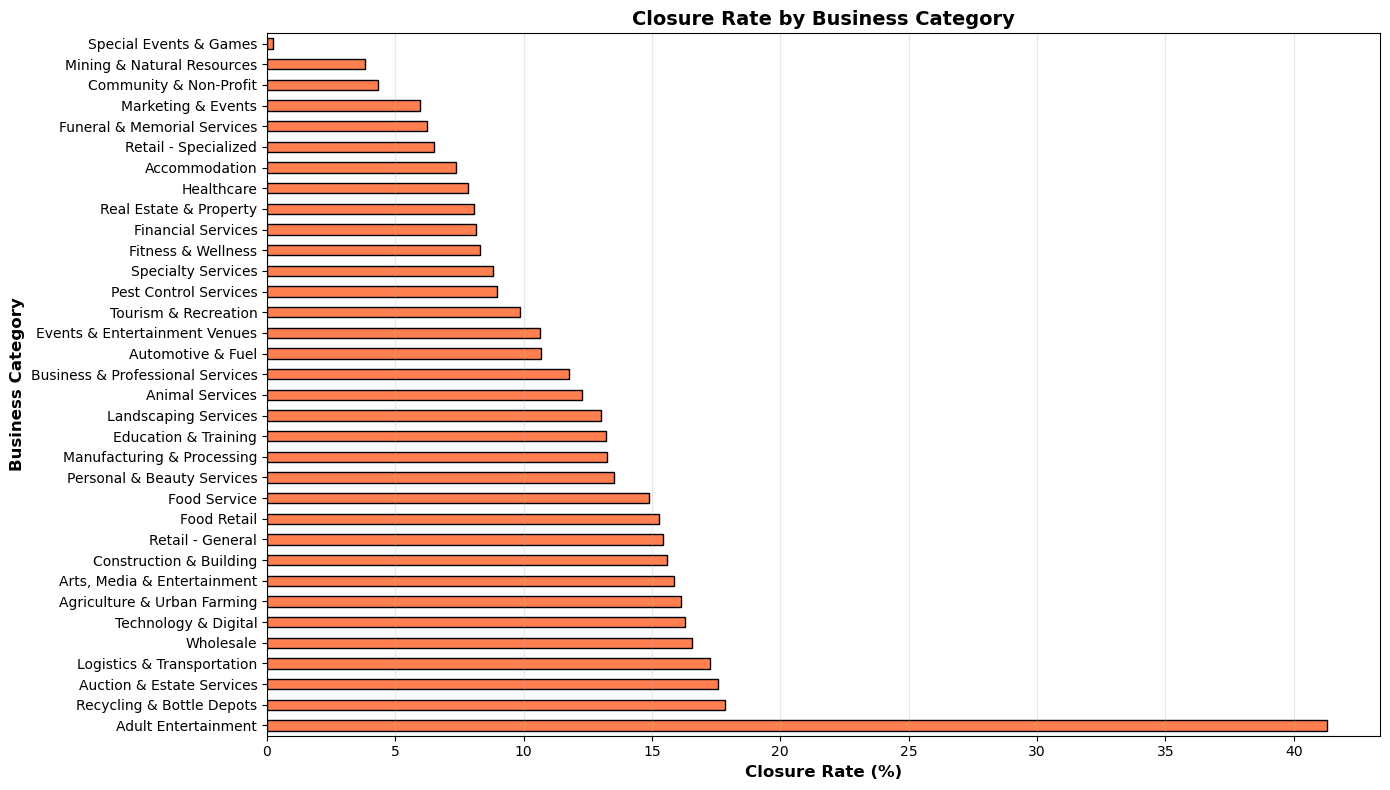


=== Closure Rate by Category ===
business_category
Adult Entertainment                 41.296928
Recycling & Bottle Depots           17.857143
Auction & Estate Services           17.560976
Logistics & Transportation          17.258994
Wholesale                           16.540432
Technology & Digital                16.287759
Agriculture & Urban Farming         16.129032
Arts, Media & Entertainment         15.855236
Construction & Building             15.577968
Retail - General                    15.412451
Food Retail                         15.280393
Food Service                        14.862607
Personal & Beauty Services          13.506203
Manufacturing & Processing          13.261255
Education & Training                13.214108
Landscaping Services                13.023256
Animal Services                     12.262774
Business & Professional Services    11.762073
Automotive & Fuel                   10.679557
Events & Entertainment Venues       10.632642
Tourism & Recreation        

In [92]:
# Analyze by business category
issued_by_category = issued_businesses.groupby(['FOLDERYEAR', 'business_category']).size().unstack(fill_value=0)
gob_by_category = gone_out.groupby(['FOLDERYEAR', 'business_category']).size().unstack(fill_value=0)

# Calculate closure rate by category (total)
total_issued_cat = issued_businesses['business_category'].value_counts()
total_gob_cat = gone_out['business_category'].value_counts()

closure_rate_by_category = (total_gob_cat / total_issued_cat * 100).sort_values(ascending=False)

# Plot closure rates by category
plt.figure(figsize=(14, 8))
closure_rate_by_category.plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Closure Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Business Category', fontsize=12, fontweight='bold')
plt.title('Closure Rate by Business Category', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Closure Rate by Category ===")
print(closure_rate_by_category)


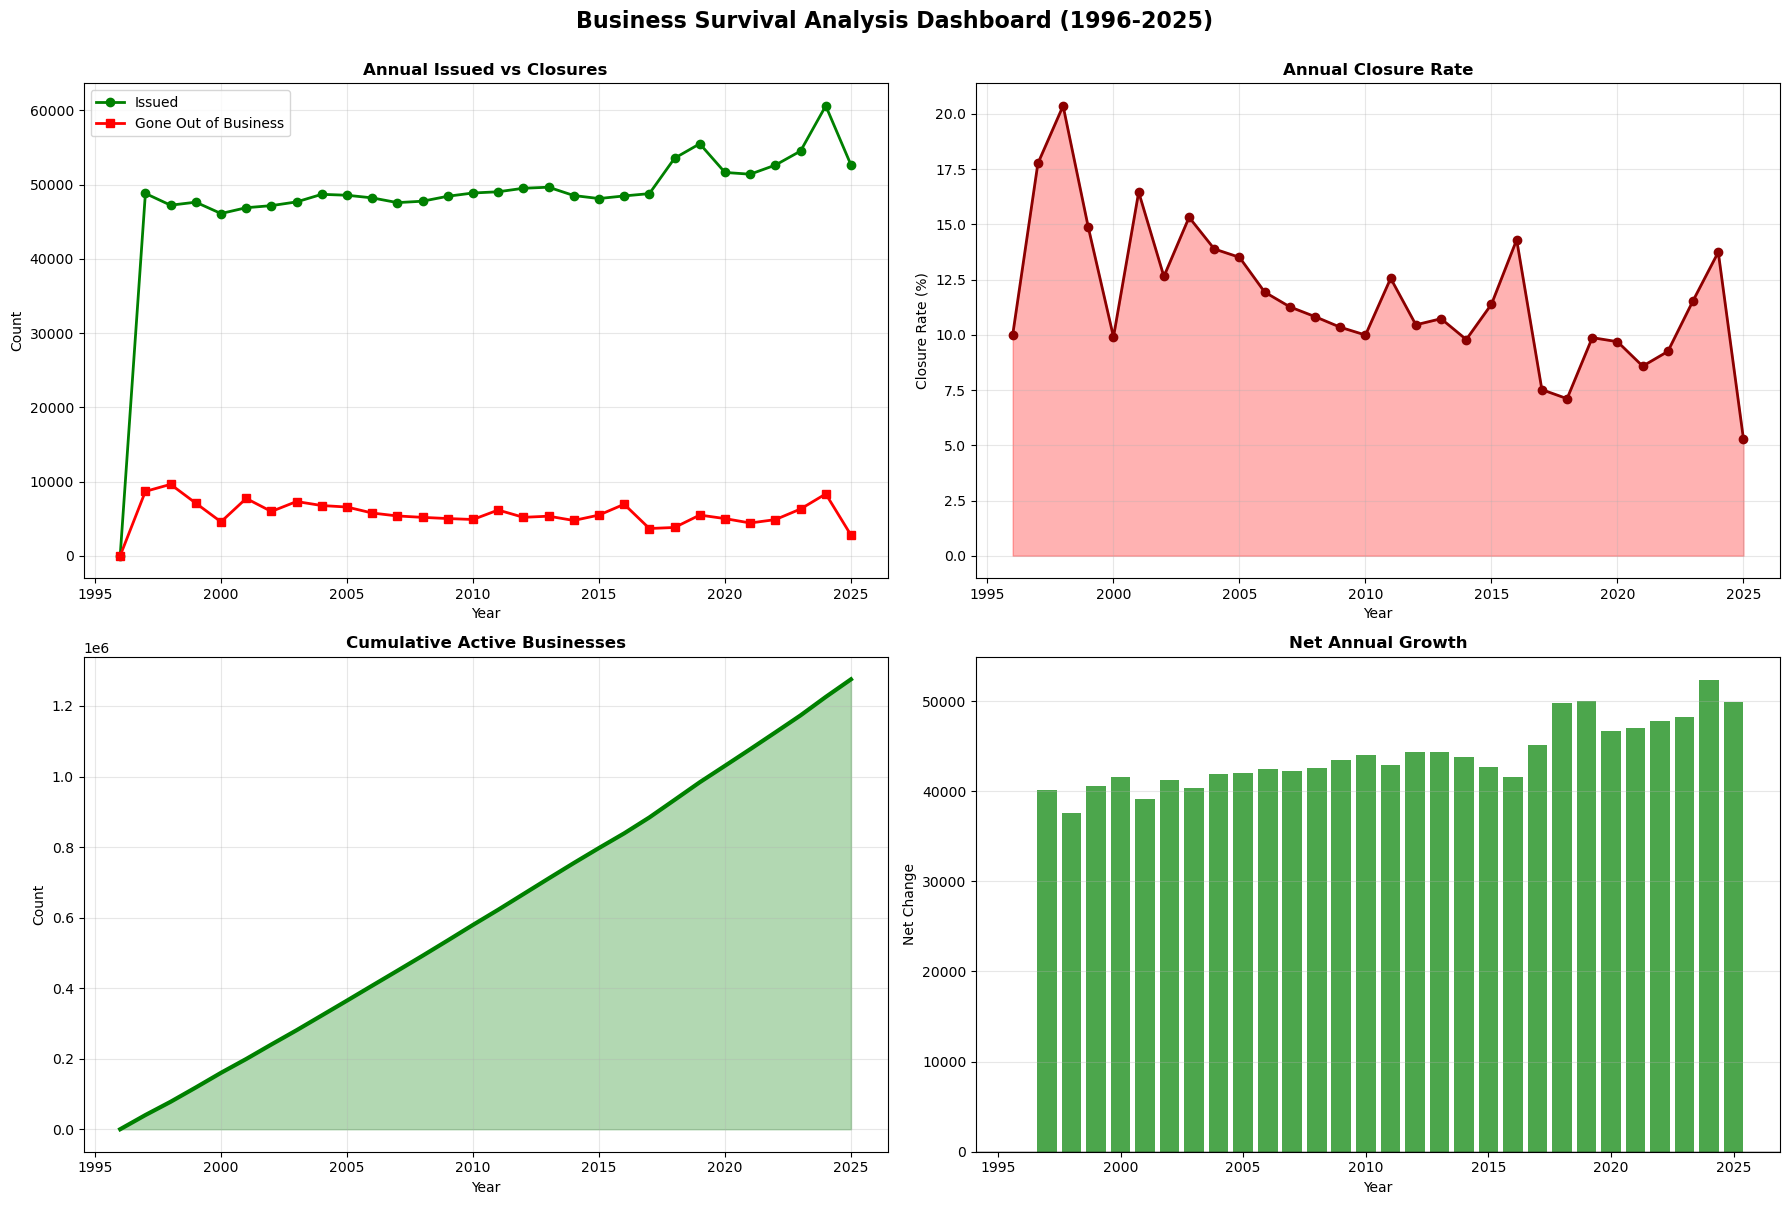

In [95]:
# Create a comprehensive dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Total Issued vs GOB
ax1.plot(status_comparison.index, status_comparison['Issued'], marker='o', linewidth=2, label='Issued', color='green')
ax1.plot(status_comparison.index, status_comparison['Gone Out of Business'], marker='s', linewidth=2, label='Gone Out of Business', color='red')
ax1.set_title('Annual Issued vs Closures', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Closure Rate %
ax2.plot(status_comparison.index, status_comparison['Closure Rate (%)'], marker='o', linewidth=2, color='darkred')
ax2.fill_between(status_comparison.index, status_comparison['Closure Rate (%)'], alpha=0.3, color='red')
ax2.set_title('Annual Closure Rate', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Closure Rate (%)')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Active Businesses
ax3.plot(cumulative_df.index, cumulative_df['Active Businesses'], linewidth=3, color='green')
ax3.fill_between(cumulative_df.index, cumulative_df['Active Businesses'], alpha=0.3, color='green')
ax3.set_title('Cumulative Active Businesses', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')
ax3.grid(True, alpha=0.3)

# 4. Net Change
colors = ['green' if x >= 0 else 'red' for x in status_comparison['Net Change']]
ax4.bar(status_comparison.index, status_comparison['Net Change'], color=colors, alpha=0.7)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_title('Net Annual Growth', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Net Change')
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Business Survival Analysis Dashboard (1996-2025)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create business lifecycle data
# For each unique business, find when it was issued and when/if it closed

# Get issue year for each business
issued_businesses = df_combined[df_combined['Status'] == 'Issued'][['LicenceNumber', 'FOLDERYEAR']].copy()
issued_businesses.columns = ['LicenceNumber', 'Issue_Year']

# Get closure year for each business
closed_businesses = df_combined[df_combined['Status'] == 'Gone Out of Business'][['LicenceNumber', 'FOLDERYEAR']].copy()
closed_businesses.columns = ['LicenceNumber', 'Close_Year']

# Merge to create lifecycle
business_lifecycle = issued_businesses.merge(closed_businesses, on='LicenceNumber', how='inner')

# Calculate years in business before closure
business_lifecycle['Years_in_Business'] = business_lifecycle['Close_Year'] - business_lifecycle['Issue_Year']

# Remove negative values (data quality issues)
business_lifecycle = business_lifecycle[business_lifecycle['Years_in_Business'] >= 0]

print("=== Business Lifecycle Summary ===")
print(f"Total businesses issued: {len(issued_businesses)}")
print(f"Total businesses closed: {len(closed_businesses)}")
print(f"Businesses we can track (issued → closed): {len(business_lifecycle)}")
print(f"\nAverage years in business: {business_lifecycle['Years_in_Business'].mean():.2f}")
print(f"Median years in business: {business_lifecycle['Years_in_Business'].median():.2f}")

print("\n=== Sample Data ===")
print(business_lifecycle.head(10))

=== Business Lifecycle Summary ===
Total businesses issued: 1444552
Total businesses closed: 168939
Businesses we can track (issued → closed): 131

Average years in business: 0.00
Median years in business: 0.00

=== Sample Data ===
  LicenceNumber  Issue_Year  Close_Year  Years_in_Business
0     04-026862        2004        2004                  0
1     04-003098        2004        2004                  0
2     98-100000        1998        1998                  0
3     97-038159        1997        1997                  0
4     99-249259        1999        1999                  0
5     04-045365        2004        2004                  0
6     04-046849        2004        2004                  0
7     97-035095        1997        1997                  0
8     04-025357        2004        2004                  0
9     04-039036        2004        2004                  0


In [110]:
import pandas as pd

# Make sure dataframe is sorted by business + year
df_sorted = df_combined.sort_values(
    by=["LicenceRSN", "FOLDERYEAR"]
).reset_index(drop=True)

# Define closure and reactivation statuses
closed_statuses = ["Inactive", "Gone Out of Business", "Cancelled"]
reactivated_statuses = ["Issued", "Pending"]

# Function to check if a business reactivated after being closed
def check_reactivation(group):
    group = group.sort_values("FOLDERYEAR")

    # Mark where business was closed
    closed_years = group.loc[group["Status"].isin(closed_statuses), "FOLDERYEAR"]

    if closed_years.empty:
        return pd.Series({
            "reactivated_after_closed": False,
            "year_closed": None,
            "year_reactivated": None
        })

    # Earliest closed year
    closed_year = closed_years.min()

    # Look for issued/pending *after* this year
    reactivation = group[
        (group["FOLDERYEAR"] > closed_year) &
        (group["Status"].isin(reactivated_statuses))
    ]

    if not reactivation.empty:
        return pd.Series({
            "reactivated_after_closed": True,
            "year_closed": closed_year,
            "year_reactivated": reactivation["FOLDERYEAR"].min()
        })
    else:
        return pd.Series({
            "reactivated_after_closed": False,
            "year_closed": closed_year,
            "year_reactivated": None
        })

# Apply the function grouped by business identity
results = df_sorted.groupby(["LicenceRSN", "BusinessName"]).apply(check_reactivation)

# Reset index for readability
results = results.reset_index()

results.head()


/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_1326/4161764444.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df_sorted.groupby(["LicenceRSN", "BusinessName"]).apply(check_reactivation)


,LicenceRSN,BusinessName,reactivated_after_closed,year_closed,year_reactivated
0,1,Im-Pres Image Company Ltd,False,NaN,None
1,4,A Able Vending 1990 Ltd,False,1997.0,None
2,7,Active Automated Services,False,1997.0,None
3,9,Ahn & Sons Holdings Ltd,False,1997.0,None
4,10,Alandra Apt,False,1997.0,None


In [116]:
results['year_closed'].value_counts()

year_closed
2024.0    62959
1998.0    11553
2023.0    10051
1997.0    10011
2016.0     9616
2001.0     9259
2005.0     9233
2003.0     8964
2021.0     8819
2022.0     8549
2020.0     8538
1999.0     8537
2004.0     8468
2011.0     8196
2006.0     7850
2015.0     7667
2013.0     7535
2002.0     7449
2012.0     7090
2007.0     7083
2008.0     7079
2010.0     7076
2009.0     7040
2019.0     6940
2014.0     6812
2017.0     6758
2025.0     6512
2018.0     6087
2000.0     5994
1996.0        1
Name: count, dtype: int64

In [21]:
import geopandas as gpd

# Adjust this path to wherever your shapefile folder is
neigh = gpd.read_file("local-area-boundary.shp")

# Always convert to WGS84 lat/lon for deck.gl
neigh = neigh.to_crs(epsg=4326)

neigh.head()

,Name,geometry
0,Kensington-Cedar Cottage,"POLYGON ((-123.05659 49.26198, -123.05663 49.2..."
1,Kitsilano,"POLYGON ((-123.13768 49.27532, -123.14375 49.2..."
2,Riley Park,"POLYGON ((-123.10562 49.23312, -123.11617 49.2..."
3,West Point Grey,"POLYGON ((-123.22445 49.27892, -123.20515 49.2..."
4,Mount Pleasant,"POLYGON ((-123.10067 49.26913, -123.09692 49.2..."


In [28]:
df_active = df[df["status"] == "Issued"]

# Clean neighbourhood column (optional)
df_active["localarea"] = df_active["localarea"].str.strip().str.title()

/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_12074/4184088641.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



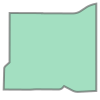

In [95]:
neigh['geometry'][5]

In [115]:
gdf_polygons.head()

,name,geo_point_2d,geometry
0,Riley Park,"{ ""lon"": -123.10314680625231, ""lat"": 49.244766...","POLYGON ((-123.10562 49.23312, -123.11617 49.2..."
1,Shaughnessy,"{ ""lon"": -123.13976016672807, ""lat"": 49.245680...","POLYGON ((-123.15527 49.23452, -123.15508 49.2..."
2,Victoria-Fraserview,"{ ""lon"": -123.06413471832595, ""lat"": 49.220011...","POLYGON ((-123.05683 49.2042, -123.05846 49.20..."
3,West Point Grey,"{ ""lon"": -123.20346748255886, ""lat"": 49.268401...","POLYGON ((-123.22445 49.27892, -123.20515 49.2..."
4,Sunset,"{ ""lon"": -123.09203800098149, ""lat"": 49.218756...","POLYGON ((-123.10696 49.20416, -123.10616 49.2..."


In [111]:
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(",", expand=True).astype(float)

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
    crs="EPSG:4326"  # WGS84
)

# Load municipal polygons
gdf_polygons = gpd.read_file("local-area-boundary.geojson")

# Ensure polygon CRS matches point CRS
gdf_polygons = gdf_polygons.to_crs("EPSG:4326")

gdf_joined = gpd.sjoin(
    gdf_points,
    gdf_polygons,
    how="left",
    predicate="within"
)

# region_counts = gdf_joined['name'].value_counts()
# print(region_counts)

# gdf_joined.head()

,folderyear,licencersn,licencenumber,licencerevisionnumber,businessname,businesstradename,status,issueddate,expireddate,businesstype,...,businesscategory,toplevelcategory,year,business_id,latitude,longitude,geometry,index_right,name,geo_point_2d_right
0,1998,173103,98-212536,0.0,Rubien Tang Benjamin Ng,,Gone Out of Business,NaN,NaN,Real Estate & Property,...,Real Estate & Property,Real Estate & Property,1998,rubien_tang_benjamin_ng,NaN,NaN,POINT (NaN NaN),NaN,NaN,NaN
1,1998,173119,98-212552,0.0,Terrise Mathers & Arthur Schmale,,Pending,NaN,NaN,Real Estate & Property,...,Real Estate & Property,Real Estate & Property,1998,terrise_mathers_&_arthur_schmale,NaN,NaN,POINT (NaN NaN),NaN,NaN,NaN
2,1998,173217,98-212650,0.0,Kam Fung Kwan,,Issued,1998-02-25,1998-12-31,Real Estate & Property,...,Real Estate & Property,Real Estate & Property,1998,kam_fung_kwan,NaN,NaN,POINT (NaN NaN),NaN,NaN,NaN
3,1998,173496,98-212929,0.0,Pierre Moreau,,Pending,NaN,NaN,Real Estate & Property,...,Real Estate & Property,Real Estate & Property,1998,pierre_moreau,NaN,NaN,POINT (NaN NaN),NaN,NaN,NaN
4,1998,173617,98-213050,0.0,Patricia Salter,,Pending,NaN,NaN,Real Estate & Property,...,Real Estate & Property,Real Estate & Property,1998,patricia_salter,NaN,NaN,POINT (NaN NaN),NaN,NaN,NaN


In [153]:


# gdf_joined["count"] = gdf_joined["count"].fillna(0)

# agg = (
#     gdf_joined
#     .groupby(["name", "folderyear"])
#     .size()
#     .reset_index(name="count")
# )
legend_html = """
<div style="
    position: absolute;
    top: 20px;
    right: 20px;
    width: 240px;
    height: 40px;
    background: linear-gradient(to right, red, yellow, green);
    border: 2px solid #000;
    padding: 8px;
    font-family: Arial;
    color: black;
    font-size: 12px;
">
    <b>Business Count (log scale)</b><br>
    Low &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; → &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; High
</div>
"""



merged = agg.merge(
    gdf_polygons,
    left_on="name",            # Or AREA_NAME depending on your shapefile
    right_on="name",
    how="left"
)

global_max = merged["count"].max()

def geom_to_coords(geom):
    if geom.geom_type == "Polygon":
        return [list(geom.exterior.coords)]
    elif geom.geom_type == "MultiPolygon":
        return [list(poly.exterior.coords) for poly in geom]
    else:
        return None

merged["polygon"] = merged["geometry"].apply(geom_to_coords)
merged.head()

,name,folderyear,count,geo_point_2d,geometry,polygon
0,Arbutus Ridge,2013,317,"{ ""lon"": -123.16166923820482, ""lat"": 49.246804...","POLYGON ((-123.1526 49.25723, -123.16488 49.25...","[[(-123.15259552001952, 49.25722503568872), (-..."
1,Arbutus Ridge,2014,320,"{ ""lon"": -123.16166923820482, ""lat"": 49.246804...","POLYGON ((-123.1526 49.25723, -123.16488 49.25...","[[(-123.15259552001952, 49.25722503568872), (-..."
2,Arbutus Ridge,2015,317,"{ ""lon"": -123.16166923820482, ""lat"": 49.246804...","POLYGON ((-123.1526 49.25723, -123.16488 49.25...","[[(-123.15259552001952, 49.25722503568872), (-..."
3,Arbutus Ridge,2016,345,"{ ""lon"": -123.16166923820482, ""lat"": 49.246804...","POLYGON ((-123.1526 49.25723, -123.16488 49.25...","[[(-123.15259552001952, 49.25722503568872), (-..."
4,Arbutus Ridge,2017,346,"{ ""lon"": -123.16166923820482, ""lat"": 49.246804...","POLYGON ((-123.1526 49.25723, -123.16488 49.25...","[[(-123.15259552001952, 49.25722503568872), (-..."


In [158]:
import numpy as np
import pydeck as pdk

global_log_min = np.log1p(merged["count"]).min()
global_log_max = np.log1p(merged["count"]).max()

def create_map(year, geo_df):
    df_year = geo_df[geo_df["folderyear"] == year].copy()

    # ---- LOG SCALE ----
    log_val = np.log1p(df_year["count"])
    df_year["color_value"] = ((log_val - global_log_min) / 
                              (global_log_max - global_log_min)) * 255

    # Keep safe columns only
    df_year = df_year[["name", "folderyear", "count", "color_value", "polygon"]]

    layer = pdk.Layer(
        "PolygonLayer",
        df_year,
        get_polygon="polygon",
        get_fill_color="[color_value, 255 - color_value, 80]",  # log-scaled colors
        stroked=True,
        get_line_color=[0, 0, 0],
        line_width_min_pixels=1,
        pickable=True,
        auto_highlight=True,
        extruded=False
    )

    view = pdk.ViewState(
        latitude=49.2827,
        longitude=-123.1207,
        zoom=10,
        pitch=0,
        bearing=0
    )

    tooltip = {
        "html": "<b>{name}</b><br/>Businesses: {count}<br/>Year: " + str(year)
    }
    
    return pdk.Deck(
        layers=[layer],
        initial_view_state=view,
        map_style="mapbox://styles/mapbox/light-v10",
        tooltip=tooltip
    )


In [159]:
deck_2024 = create_map(2024, merged)
deck_2024.show()

In [162]:
from ipywidgets import interact

@interact(year=(2013, 2024, 1))
def show_year(year=2024):
    return create_map(year, merged)

interactive(children=(IntSlider(value=2024, description='year', max=2024, min=2013), Output()), _dom_classes=(…

In [178]:
import ipywidgets as widgets
from IPython.display import display


def show_map_with_legend(year):
    map_out.clear_output()
    with map_out:
        deck_obj = create_map(year, merged)
        display(deck_obj.show())
    display(widgets.HBox([map_out, legend_widget]))

legend_widget = widgets.HTML("""
<div style="
    width: 260px;
    height: 55px;
    background: linear-gradient(
        to right,
        rgb(0,255,80) 0%,
        rgb(128,128,80) 50%,
        rgb(255,0,80) 100%
    );
    border: 2px solid #000;
    padding: 6px;
    color: black;
    font-family: Arial;
    font-size: 13px;
">
    <b>Business Count (log scale)</b><br>
    Low &nbsp;&nbsp;&nbsp;&nbsp;→&nbsp;&nbsp;&nbsp;&nbsp; High
</div>
""")



In [177]:
from ipywidgets import interact

@interact(year=(2013, 2024, 1))
def interactive_map(year=2024):
    show_map_with_legend(year)


interactive(children=(IntSlider(value=2024, description='year', max=2024, min=2013), Output()), _dom_classes=(…